# Gradient descent

## Introduction to the data

We have a dataset `pga.csv` containing professional golfers' driving statistics in two columns, `accuracy` and `distance`. Accuracy is measured as the percentage of fairways hit over many drives. Distances is measured as the average drive distance, in yards. Our goal is to predict accuracy using distance. In golf, it's expected that the further someone hits the ball the less accurate they will be. Lets see if this holds up.<br>

For many machine learning algorithms **it's important to scale, or normalize, the data before using it**. Here we have 
* `distance`, measured in yards, 
* `accuracy`, measured in percentages. 

These two fields are **on very different scales** which can **produce bias into learning algorithms**. Many algorithms compute the Eucilidean Distance between two observations and if one of the features is vastly larger than another, the distance will be biased towards that particular feature.
* To normalize the data, for each value, subtract each the mean and then divide by the standard deviation.

After normalizing the data, we plot the data to get a visual sense of the data.


   distance  accuracy
0  0.314379 -0.707727
1  1.693777 -1.586669
2 -0.059695 -0.176699
3 -0.574047  0.372640
4  1.343083 -1.934584


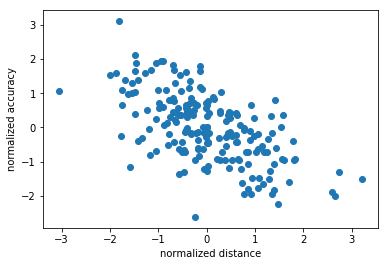

In [2]:
import pandas
import matplotlib.pyplot as plt

# Read data from csv
pga = pandas.read_csv("data/pga.csv")

# Normalize the data
pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()
print(pga.head())

plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.show()

## Linear model

From this plot, the data looks linear with a negative slope, lower accuracy with higher distance. We can use a linear model, as shown in previous missions, to model this data. This model is written as 

$$\text{accuracy}_i=\theta_{1}\text{distance}_{i}+\theta_0+\epsilon_i$$

where θ's are coefficients and ϵ are error terms. To start, lets use `sklearn`'s `LinearRegression` class to estimate a linear model.

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

# We can add a dimension to an array by using np.newaxis
print("Shape of the series:", pga.distance.shape)
print("Shape with newaxis:", pga.distance[:, np.newaxis].shape)

# The X variable in LinearRegression.fit() must have 2 dimensions
X = pga.distance[:, np.newaxis]
y = pga.accuracy

lr = LinearRegression()
lr.fit(X, y)
theta1 = lr.coef_

Shape of the series: (197,)
Shape with newaxis: (197, 1)


In [5]:
theta1

array([-0.60759882])

## Cost function, introduction

We utilized a pre-existing library `sklearn` to estimate the coefficients of our linear model, using least squares. The least squares method can effectively fit linear models since it only requires matrix algebra and provides deterministic estimates of the coefficients. Least squares is a method which directly minimized the sum of square error in a model algebraically. Often times we have too much data to fit into memory and we can't use least squares.<br>

Gradient descent is a general method that can be used to estimate coefficents of nearly any model, including linear models. At it's core, gradient descent minimizes the residuals in the estimated model by updating each coefficent based on it's gradient.<br>

To start we must understand cost functions. Most cost functions measure the difference between a model predictions and it's corresponding observations with the coefficients as parameters. Lets say our model is

$$h_{\theta}(x)=\theta_{1}x+\theta_{0}$$

The cost function is then defined as,

$$J(\theta_0, \theta_1) = \dfrac{1}{2m} \sum_{i=1}^m (h_{\theta}(x_i) - y_i)^2$$

The cost here is one half the average difference between our prediction and observation squared. As we change the coefficients of the model this cost changes. During modeling we will randomly choose the coefficients and update them intelligently to minimize this cost.

In [6]:
# The cost function of a single variable linear model
def cost(theta0, theta1, x, y):
    # Initialize cost
    J = 0
    # The number of observations
    m = len(x)
    # Loop through each observation
    for i in range(m):
        # Compute the hypothesis 
        h = theta1 * x[i] + theta0
        # Add to cost
        J += (h - y[i])**2
    # Average and normalize cost
    J /= (2*m)
    return J

# The cost for theta0=0 and theta1=1
print(cost(0, 1, pga.distance, pga.accuracy))

theta0 = 100
theta1s = np.linspace(-3,2,100)

1.5994384226


In [7]:
costs = [cost(theta0, th1, pga.distance, pga.accuracy)\
        for th1 in theta1s]

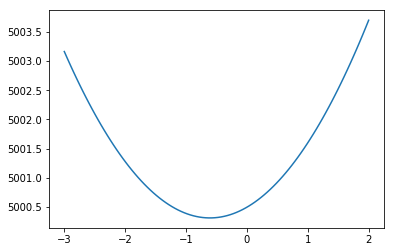

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(theta1s, costs)
plt.show()